# INTRODUCTION

Milk is one of the most important and widely consumed agricultural products in the world. It is not only a significant source of nutrition but also plays a crucial role in the global economy.Accurate forecasting of milk production is therefore essential for dairy farmers, milk processing companies, and policymakers to make informed decisions. By using advanced statistical and machine learning techniques, forecasting milk production can help to optimize production processes, reduce wastage, and ensure a stable supply of milk in the market. In this article, we will explore the different methods used for forecasting milk production and the importance of accurate forecasting in the dairy industry.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv(r'/content/monthly_milk_production.csv')
df

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


Setting Date as index

In [ ]:
Data = df.copy()

In [ ]:
Data['dt']=pd.to_datetime(Data['Date'])

In [ ]:
Data.set_index(Data['dt'],inplace=True)
Data.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='dt', length=168, freq=None)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        168 non-null    object        
 1   Production  168 non-null    int64         
 2   dt          168 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.2+ KB


In [ ]:
Data

,Date,Production,dt
dt,,,
1962-01-01,1962-01,589,1962-01-01
1962-02-01,1962-02,561,1962-02-01
1962-03-01,1962-03,640,1962-03-01
1962-04-01,1962-04,656,1962-04-01
1962-05-01,1962-05,727,1962-05-01
...,...,...,...
1975-08-01,1975-08,858,1975-08-01
1975-09-01,1975-09,817,1975-09-01
1975-10-01,1975-10,827,1975-10-01


### Dropping Unnecessay Columns:

In [ ]:
df = pd.DataFrame(Data['Production'])
df.head()

,Production
dt,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [ ]:
df.head()

,Production
dt,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


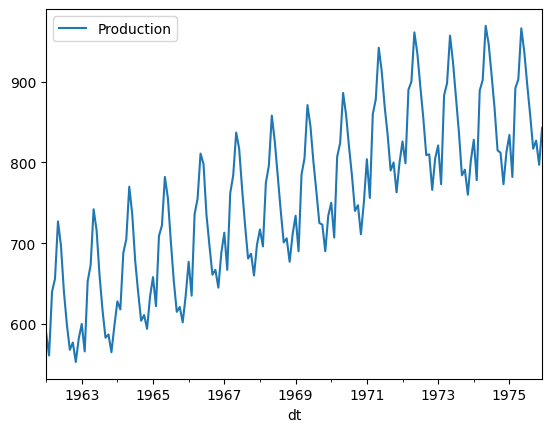

In [ ]:
df.plot();

Changing the Frequency

In [ ]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='dt', length=168, freq=None)

In [ ]:
df.index.freq = 'MS'

In [ ]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='dt', length=168, freq='MS')

### Checking for null Values

In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys = ['total','percentage of missing values'])
missing_data

,total,percentage of missing values
Production,0,0.0


### Exploratory Data Analysis

Text(0.5, 1.0, 'Observed Monthly production')

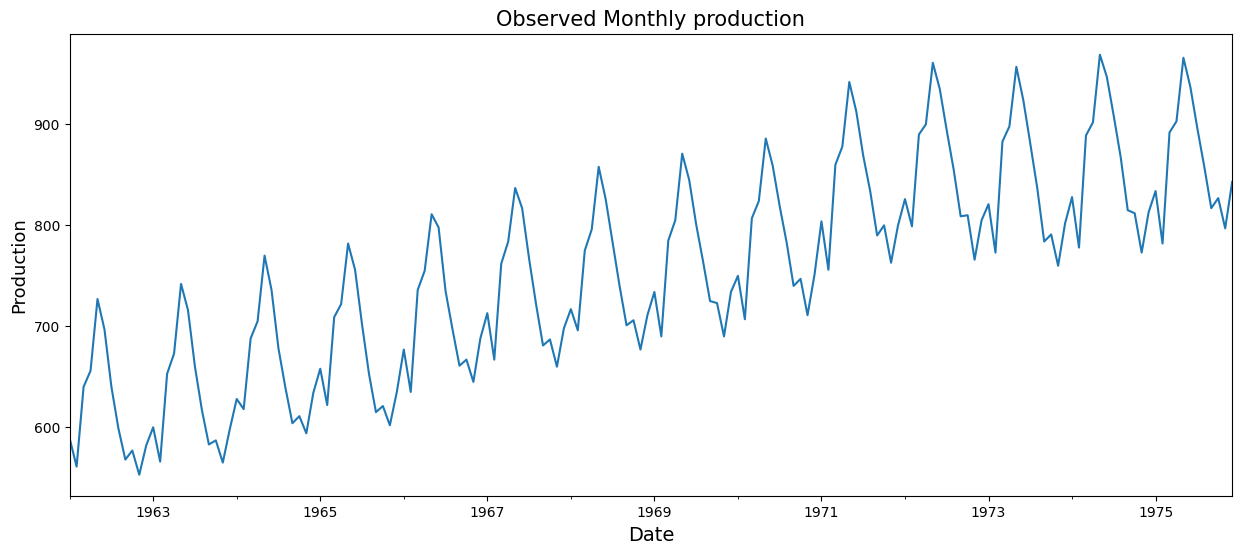

In [ ]:
df.plot(figsize=(15,6),legend = None)
plt.xlabel('Date',fontsize= 14)
plt.ylabel('Production',fontsize =13)
plt.title('Observed Monthly production',fontsize =15)

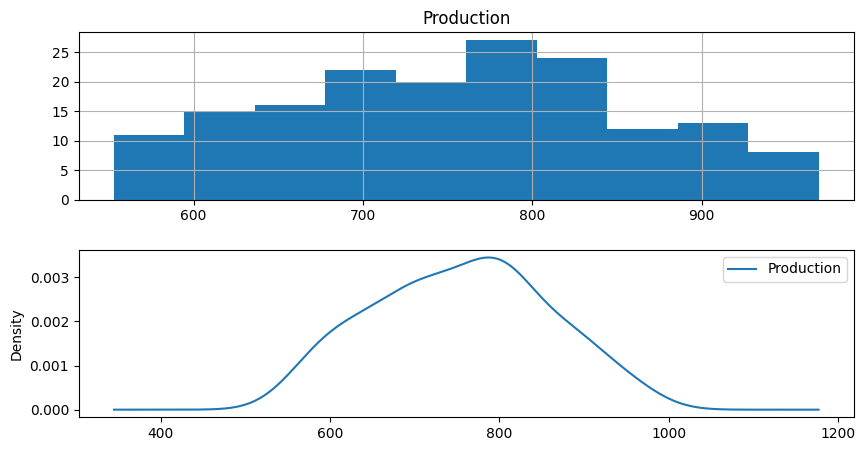

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (10,5))
df.hist(ax = ax1)
df.plot(kind = 'kde', ax = ax2)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

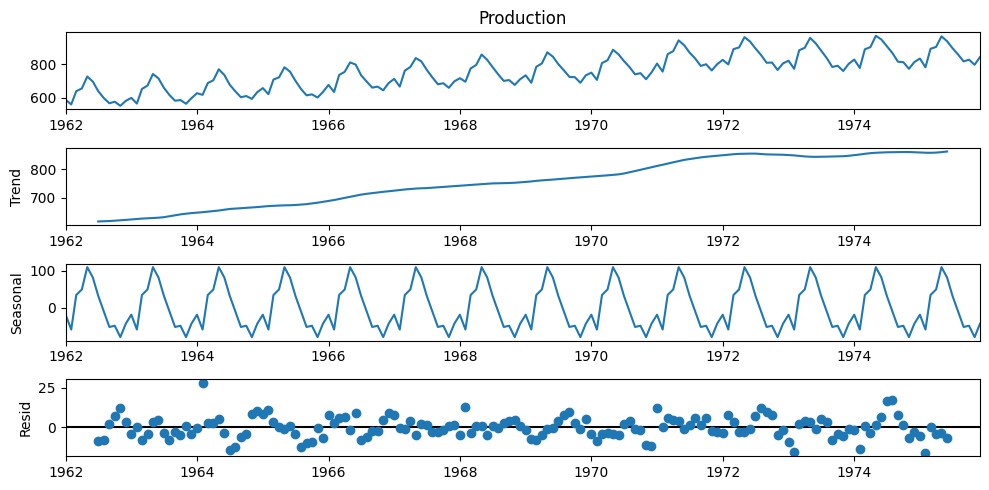

In [ ]:
decomposition = seasonal_decompose(df['Production'], period = 12, model = 'additive')
plt.rcParams['figure.figsize'] = 10, 5
decomposition.plot()
plt.show()

### checkinf for stationarity of Data

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print('result Dickey Filler test:')
    result = adfuller(timeseries,autolag = 'AIC')

    index=['test statistics','p-value','#lags used','#observation']

    result= pd.Series(result[0:4],index=index)
    print(result)
    if result[1]<=0.05:
        print('Strong Evidence against the null hypothesis')
        print('reject the null hypothesis')
        print('Data has no unit root and stationary')

    else :
        print('weak Evidence against the null hypothesis')
        print('accept the null hypothesis')
        print('Data has  unit root and non-stationary')

In [ ]:
df

,Production
dt,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [ ]:
adf_test(df['Production'])

result Dickey Filler test:
test statistics     -1.303812
p-value              0.627427
#lags used          13.000000
#observation       154.000000
dtype: float64
weak Evidence against the null hypothesis
accept the null hypothesis
Data has  unit root and non-stationary


In [ ]:
df1 = df.diff().diff(12).dropna()

In [ ]:
df1

,Production
dt,
1963-02-01,-6.0
1963-03-01,8.0
1963-04-01,4.0
1963-05-01,-2.0
1963-06-01,4.0
...,...
1975-08-01,3.0
1975-09-01,11.0
1975-10-01,13.0


In [ ]:
adf_test(df1['Production'])

result Dickey Filler test:
test statistics     -5.038002
p-value              0.000019
#lags used          11.000000
#observation       143.000000
dtype: float64
Strong Evidence against the null hypothesis
reject the null hypothesis
Data has no unit root and stationary


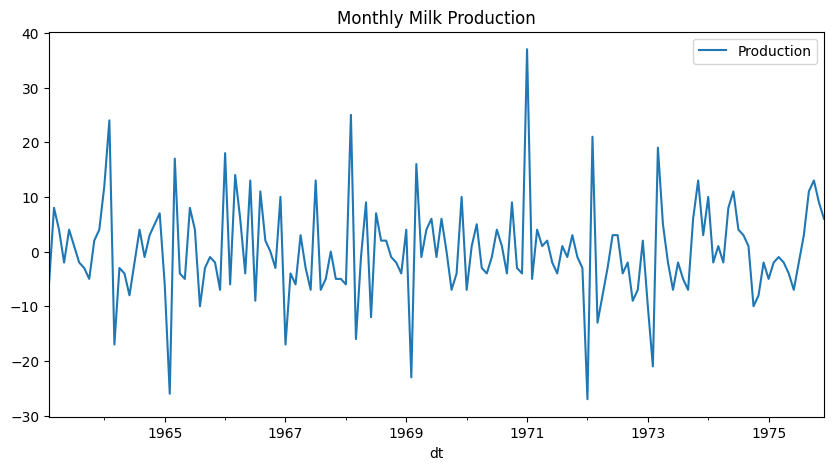

In [ ]:
df1.plot(figsize=(10,5))
plt.title('Monthly Milk Production')
plt.show()

###Pre processing the Data

In [ ]:
train = df1[:'1973']
test = df1['1973':]

Finding correlation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf# for determining (p,q)order

Autorcorrelation

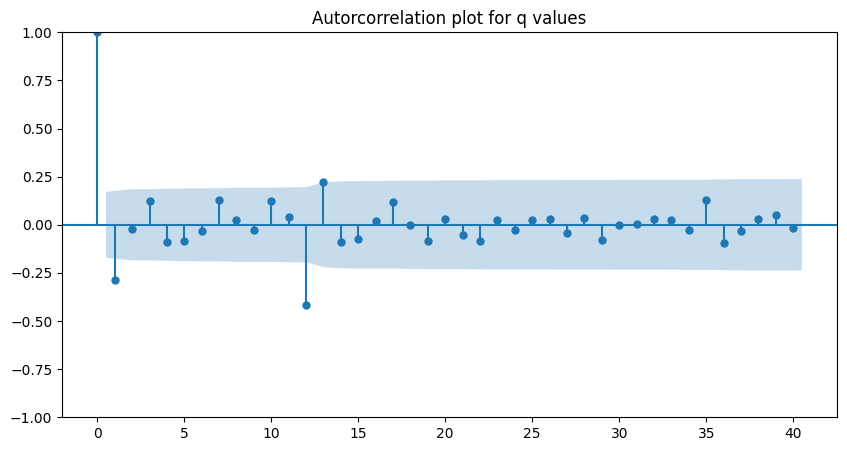

In [ ]:
title = 'Autorcorrelation plot for q values'
lags =40
plot_acf(train,title = title,lags = lags);

Partial Autorcorrelation

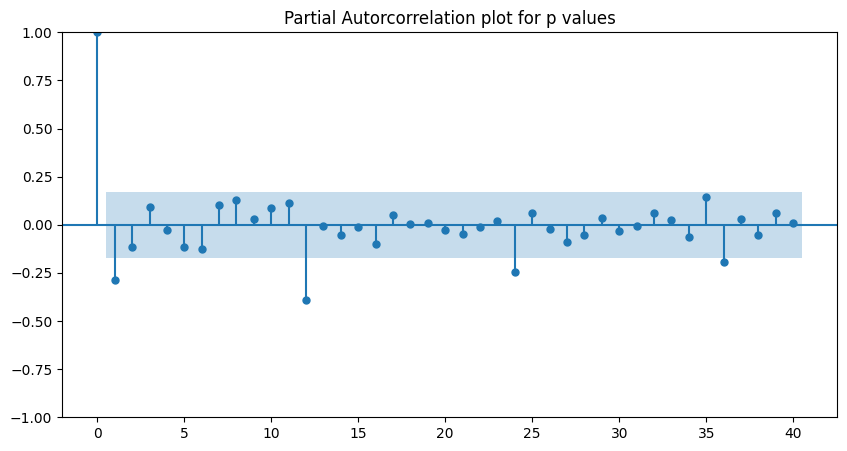

In [ ]:
title = 'Partial Autorcorrelation plot for p values'
lags =40
plot_pacf(train,title = title,lags = lags,method = 'ywm');

the Autoregressive integrated Moving Average (ARIMA ) model

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.3 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima
#the default values of several important parameters for auto_arima function are as follow:

arima_model = auto_arima(train,seasonal=True,m=12,stationary=True,stepwise = False,trace = 1,random_state = 1)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=959.705, Time=0.10 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=919.842, Time=0.24 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=921.722, Time=0.69 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=935.253, Time=0.29 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=921.751, Time=0.38 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=927.702, Time=0.36 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=922.906, Time=0.48 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=949.389, Time=0.26 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=911.417, Time=0.27 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=913.340, Time=0.88 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=925.800, Time=0.29 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=913.356, Time=0.43 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.84 sec
 ARIMA(0,0,1)(2,0,0)[1

### ARMA and ARIMA models

In [ ]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults

In [ ]:
model = ARIMA(train,order=(0,0,4))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                  131
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -469.526
Date:                Sun, 30 Jul 2023   AIC                            951.052
Time:                        12:03:40   BIC                            968.303
Sample:                    02-01-1963   HQIC                           958.062
                         - 12-01-1973                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1117      0.566     -0.197      0.844      -1.221       0.998
ma.L1         -0.3276      0.082     -3.991      0.000      -0.489      -0.167
ma.L2          0.0395      0.109      0.362      0.717      -0.174       0.253
ma.L3          0.1383      0.118      1.167      0.243      -0.094       0.370
ma.L4         -0.1729      0.108     -1.603      0.109      -0.384       0.039
sigma2        75.8347      6.053     12.529      0.000      63.972      87.698
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                49.71
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.16
Prob(H) (two-sided):                  0.35   Kurtosis:                         6.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred = results.get_forecast(steps = 12)

<Axes: >

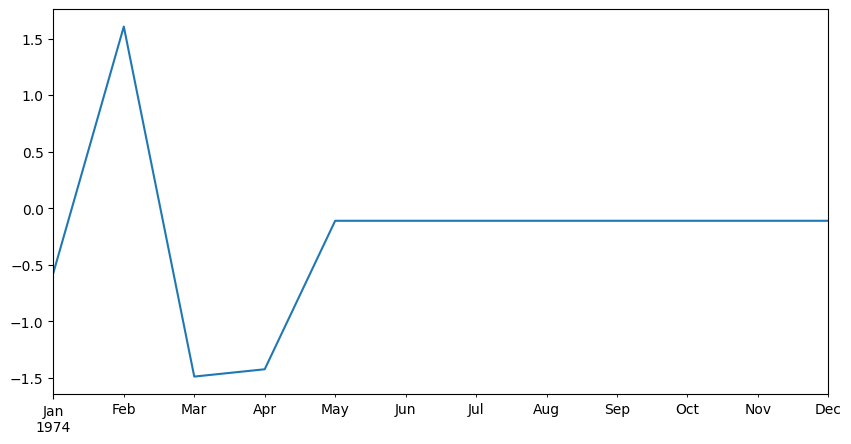

In [ ]:
pred.predicted_mean.plot()

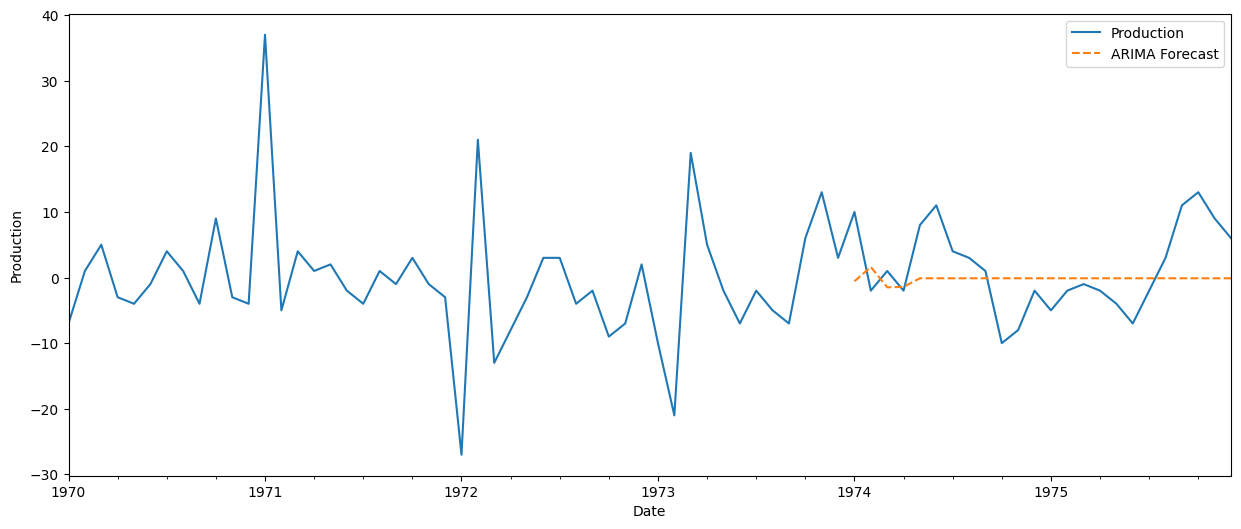

In [ ]:
#getting the ARIMA forcast with number of  steps as 36 since we want to make 3 year prediction
pred = results.get_forecast(steps = 24)
#plotting  the observed and forcasted vales
ax1 = df1['1970':].plot(label='Observed')
pred.predicted_mean.plot(ax = ax1,label = 'ARIMA Forecast',figsize= (15,6),linestyle = 'dashed')
#finding the confidnce inteval of forecasts.
pred_ci = pred.conf_int()
#ax1.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color = 'k',alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Production')
plt.legend(loc = 'upper right')
plt.show()

### SARIMAX

In [ ]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model1 =SARIMAX(train,oreder = (1,0,0),seasonal_order=(0,0,1,12),
        enforce_stationarity = False,enforce_invertibility= False)
fitted_model = model1.fit(maxiter=200)
print(fitted_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           Production   No. Observations:                  131
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -409.712
Date:                              Sun, 30 Jul 2023   AIC                            825.425
Time:                                      12:03:41   BIC                            833.737
Sample:                                  02-01-1963   HQIC                           828.800
                                       - 12-01-1973                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2993      0.092     -3.262      0.001      -0.479      -0.119
ma.S.L12      -0.62

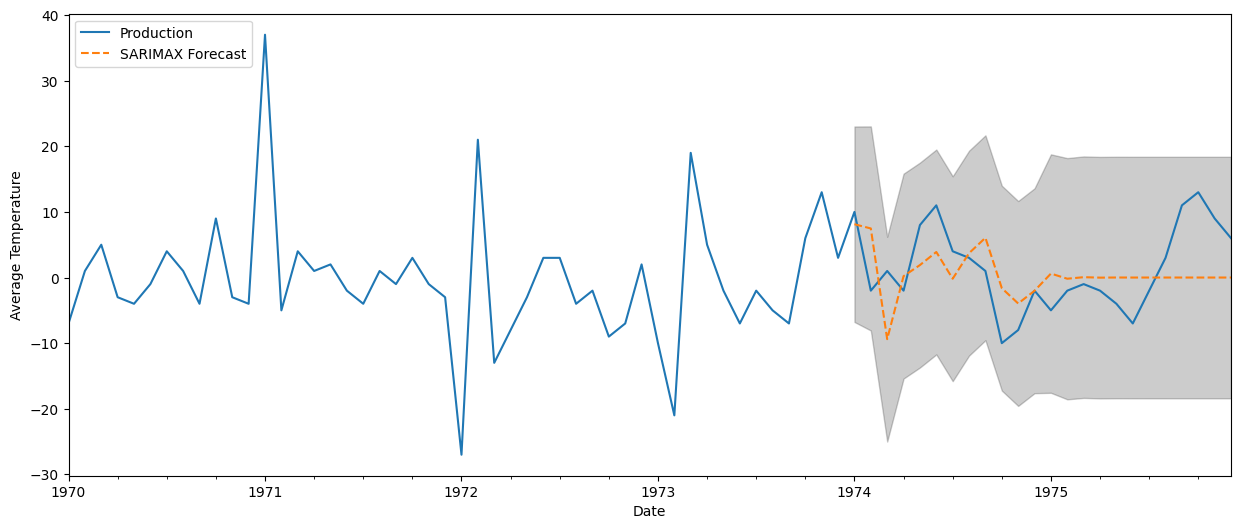

In [ ]:
#getting the ARIMA forcast with number of  steps as 36 since we want to make 3 year prediction
pred = fitted_model.get_forecast(steps =24)
#plotting  the observed and forcasted vales
ax1 = df1['1970':].plot(label='Observed')
pred.predicted_mean.plot(ax = ax1,label = 'SARIMAX Forecast',figsize= (15,6),linestyle = 'dashed')
#finding the confidnce inteval of forecasts.
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color = 'k',alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
y_forecasted_SARIMAX = pred.predicted_mean
y_truth = test['1974':]
mse_SARIMAX = ((y_forecasted_SARIMAX - y_truth) ** 2).mean()
print('The Mean Squared Error of SARIMAX forecast is {}'.format(round(mse_SARIMAX, 2)))
print('The Root Mean Squared Error of SARIMAX forecast is {}'.format(round(np.sqrt(mse_SARIMAX), 2)))

The Mean Squared Error of SARIMAX forecast is 1974-01-01 00:00:00   NaN
1974-02-01 00:00:00   NaN
1974-03-01 00:00:00   NaN
1974-04-01 00:00:00   NaN
1974-05-01 00:00:00   NaN
1974-06-01 00:00:00   NaN
1974-07-01 00:00:00   NaN
1974-08-01 00:00:00   NaN
1974-09-01 00:00:00   NaN
1974-10-01 00:00:00   NaN
1974-11-01 00:00:00   NaN
1974-12-01 00:00:00   NaN
1975-01-01 00:00:00   NaN
1975-02-01 00:00:00   NaN
1975-03-01 00:00:00   NaN
1975-04-01 00:00:00   NaN
1975-05-01 00:00:00   NaN
1975-06-01 00:00:00   NaN
1975-07-01 00:00:00   NaN
1975-08-01 00:00:00   NaN
1975-09-01 00:00:00   NaN
1975-10-01 00:00:00   NaN
1975-11-01 00:00:00   NaN
1975-12-01 00:00:00   NaN
Production            NaN
dtype: float64
The Root Mean Squared Error of SARIMAX forecast is 1974-01-01 00:00:00   NaN
1974-02-01 00:00:00   NaN
1974-03-01 00:00:00   NaN
1974-04-01 00:00:00   NaN
1974-05-01 00:00:00   NaN
1974-06-01 00:00:00   NaN
1974-07-01 00:00:00   NaN
1974-08-01 00:00:00   NaN
1974-09-01 00:00:00   NaN
1974

### From here we will work on LSTM

In [ ]:
df.size

168

In [ ]:
df.size-12

156

In [ ]:
ltrain = df.iloc[:156]
ltest =df.iloc[156:]

In [ ]:
ltrain

,Production
dt,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [ ]:
ltest

,Production
dt,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(ltrain)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(ltrain)
scaled_test = scaler.transform(ltest)

In [ ]:
scaled_train[:12]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154]])

In [ ]:
scaled_train.max(),scaled_train.min()

(1.0000000000000002, 0.0)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input=2
n_feature = 1

In [ ]:
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input,batch_size = 1)

In [ ]:
generator[0]

(array([[[0.08653846],
         [0.01923077]]]),
 array([[0.20913462]]))

In [ ]:
X,y = generator[0]

In [ ]:
X

array([[[0.08653846],
        [0.01923077]]])

In [ ]:
y

array([[0.20913462]])

In [ ]:
len(scaled_train)

156

In [ ]:
len(generator)

154

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
n_input = 12
n_feature = 1
train_generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input,batch_size = 1)

In [ ]:
train_generator[0]

(array([[[0.08653846],
         [0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154]]]),
 array([[0.11298077]]))

In [ ]:
X.shape

(1, 2, 1)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100,input_shape=(n_input,n_feature),return_sequences=True),
    tf.keras.layers.LSTM(50,return_sequences=True),
    tf.keras.layers.LSTM(10),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer = 'adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 12, 50)            30200     
                                                                 
 lstm_2 (LSTM)               (None, 10)                2440      
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 76,257
Trainable params: 76,257
Non-traina

In [ ]:
pwd

'/content'

In [ ]:
from keras.callbacks import EarlyStopping
callback= EarlyStopping(monitor='loss',patience=5)

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content',monitor = 'loss',save_best_only=True)

In [ ]:
model.fit(train_generator,epochs=25,callbacks=[callback])

Epoch 1/25
144/144 [==============================] - 11s 27ms/step - loss: 0.0366
Epoch 2/25
144/144 [==============================] - 4s 30ms/step - loss: 0.0257
Epoch 3/25
144/144 [==============================] - 6s 38ms/step - loss: 0.0220
Epoch 4/25
144/144 [==============================] - 5s 37ms/step - loss: 0.0192
Epoch 5/25
144/144 [==============================] - 6s 43ms/step - loss: 0.0207
Epoch 6/25
144/144 [==============================] - 5s 33ms/step - loss: 0.0185
Epoch 7/25
144/144 [==============================] - 6s 38ms/step - loss: 0.0180
Epoch 8/25
144/144 [==============================] - 5s 33ms/step - loss: 0.0156
Epoch 9/25
144/144 [==============================] - 3s 21ms/step - loss: 0.0196
Epoch 10/25
144/144 [==============================] - 3s 19ms/step - loss: 0.0146
Epoch 11/25
144/144 [==============================] - 3s 19ms/step - loss: 0.0118
Epoch 12/25
144/144 [==============================] - 3s 19ms/step - loss: 0.0102
Epoch 13/25


In [ ]:
model.history.history.keys()

dict_keys(['loss'])

In [ ]:
model.history.history['loss']

[0.03655218333005905,
 0.02569800801575184,
 0.02201792411506176,
 0.019164077937602997,
 0.020722990855574608,
 0.018520904704928398,
 0.017960352823138237,
 0.015599284321069717,
 0.019565215334296227,
 0.014616340398788452,
 0.01181509718298912,
 0.010175714269280434,
 0.010336599312722683,
 0.013052703812718391,
 0.010778781957924366,
 0.008471650071442127,
 0.007487456779927015,
 0.00648149661719799,
 0.006981411017477512,
 0.005996884312480688,
 0.005842515733093023,
 0.008870124816894531,
 0.006652677897363901,
 0.005969671998172998,
 0.005505192093551159]

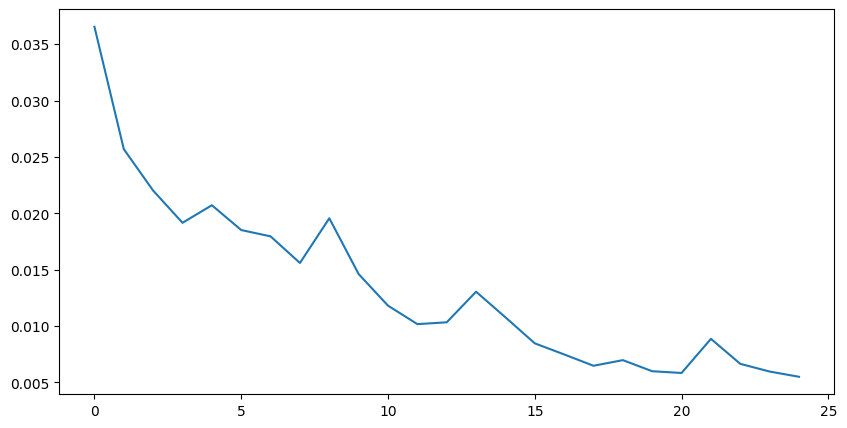

In [ ]:
my_loss = model.history.history['loss']
plt.plot(range(len(my_loss)),my_loss)

In [ ]:
first_eval_batch = scaled_train[-12:]
print(first_eval_batch)

[[0.66105769]
 [0.54086538]
 [0.80769231]
 [0.83894231]
 [1.        ]
 [0.94711538]
 [0.85336538]
 [0.75480769]
 [0.62980769]
 [0.62259615]
 [0.52884615]
 [0.625     ]]


In [ ]:
X_train,y_train=train_generator[0]

In [ ]:
X_train.shape

(1, 12, 1)

In [ ]:
#so reshape the first_eval_batch with the same shape
first_eval_batch.shape

(12, 1)

In [ ]:
first_eval_batch=first_eval_batch.reshape(1,n_input,n_feature)

In [ ]:
first_eval_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [ ]:
model.predict(first_eval_batch)

1/1 [==============================] - 1s 1s/step


array([[0.57526135]], dtype=float32)

Forcasting using RNN Model

In [ ]:
test_prediction = []
first_eval_batch = scaled_train[-n_input:]

In [ ]:
current_batch =first_eval_batch.reshape((1,n_input,n_feature))


In [ ]:
for i in range(len(ltest)):

  current_pred= model.predict(current_batch)[0]

  test_prediction.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 26ms/step


In [ ]:
first_pred = model.predict(current_batch)[0]

1/1 [==============================] - 0s 34ms/step


In [ ]:
first_pred

array([0.56672066], dtype=float32)

In [ ]:
current_batch.shape

(1, 12, 1)

In [ ]:
current_batch

array([[[0.57526135],
        [0.61693156],
        [0.76302242],
        [0.83856106],
        [0.90850371],
        [0.87110603],
        [0.77714562],
        [0.67566592],
        [0.60001242],
        [0.56500167],
        [0.53378278],
        [0.5524025 ]]])

In [ ]:
np.append(current_batch[:,1:,:],[[first_pred]],axis=1)

array([[[0.61693156],
        [0.76302242],
        [0.83856106],
        [0.90850371],
        [0.87110603],
        [0.77714562],
        [0.67566592],
        [0.60001242],
        [0.56500167],
        [0.53378278],
        [0.5524025 ],
        [0.56672066]]])

In [ ]:
test_prediction = []
first_eval_batch = scaled_train[-n_input:]

current_batch =first_eval_batch.reshape((1,n_input,n_feature))

for i in range(len(ltest)):

  current_pred= model.predict(current_batch)[0]

  test_prediction.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 27ms/step


In [ ]:
test_prediction

[array([0.57526135], dtype=float32),
 array([0.61693156], dtype=float32),
 array([0.7630224], dtype=float32),
 array([0.83856106], dtype=float32),
 array([0.9085037], dtype=float32),
 array([0.871106], dtype=float32),
 array([0.7771456], dtype=float32),
 array([0.6756659], dtype=float32),
 array([0.6000124], dtype=float32),
 array([0.56500167], dtype=float32),
 array([0.5337828], dtype=float32),
 array([0.5524025], dtype=float32)]

In [ ]:
true_prediction  = scaler.inverse_transform(test_prediction)

In [ ]:
true_prediction

array([[792.30872345],
       [809.64352798],
       [870.41732788],
       [901.84140015],
       [930.93754387],
       [915.38010788],
       [876.29257965],
       [834.07702065],
       [802.60516739],
       [788.04069328],
       [775.05363655],
       [782.79943848]])

In [ ]:
ltest['Prediction']= true_prediction

In [ ]:
ltest

,Production,Prediction
dt,,
1975-01-01,834,792.308723
1975-02-01,782,809.643528
1975-03-01,892,870.417328
1975-04-01,903,901.841400
1975-05-01,966,930.937544
1975-06-01,937,915.380108
1975-07-01,896,876.292580
1975-08-01,858,834.077021
1975-09-01,817,802.605167


<Axes: xlabel='dt'>

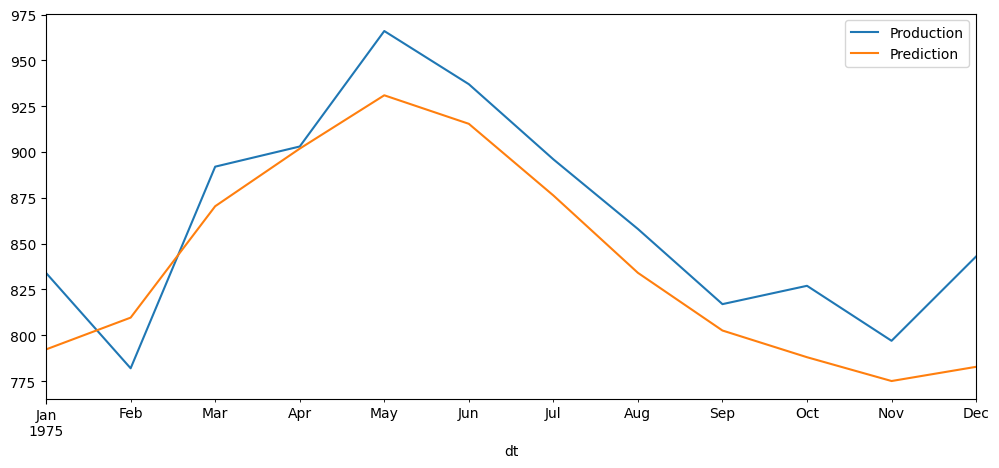

In [ ]:
ltest.plot(figsize=(12,5))

In [ ]:
model.save('project_prediction')

In [ ]:
pwd

'/content'

In [ ]:
#to import the model

from keras.models import load_model

In [ ]:
new_model = load_model('project_prediction')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 12, 50)            30200     
                                                                 
 lstm_2 (LSTM)               (None, 10)                2440      
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 76,257
Trainable params: 76,257
Non-traina

# Conclusion

In this data set I perform ARIMA, SARIMA, and LSTM model. On the basis of the prediction of above models my conclusion is LSTM model is giving me most accuret prediction. Other two models ARIMA and SARIMA is giving me an absured prediction. SO LSTM is good model for prediction on Monthly Milk Production Data set.